> Introdução à Ciência dos Dados \
> Ciência da Computação – UFV/Florestal


* **Nome:** Miguel Antônio Ribeiro e Silva
* **Matrícula:**  04680

# Aula Prática 09
## Aprendizado Supervisionado
**Objetivo:** Utilizar a biblioteca scikit-learn para treinar e testar modelos de aprendizado supervisionado \\
**Pré-requisitos:** Linguagem de programação Python, Linux, estatística \\
**Meta**: Ao final da prática, o aluno será capaz de preparar dados e criar modelos de classificação

In [119]:
### NÃO REMOVA ESSA CÉLULA! ####
!pip --no-cache-dir install --upgrade learntools_dados_ufv

#!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p9/weatherHistory.csv

In [120]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from learntools_dados_ufv.core import binder; binder.bind(globals())
from learntools_dados_ufv.ccf425.pratica_9 import *

print("Setup complete.")

Setup complete.


    ------
## Roteiro

### Ler o conjunto de dados
O conjunto de dados que iremos utilizar é o **iris dataset**, que é um dataset clássico no treinamento em Inteligência Artificial. Os dados estão disponíveis diretamente na biblioteca `scikit-learn`.

In [121]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=np.append(iris['feature_names'], ['target']))

# Converte a coluna target para int
iris_df['target'] = iris_df['target'].astype('int64')

### Visualizar os dados

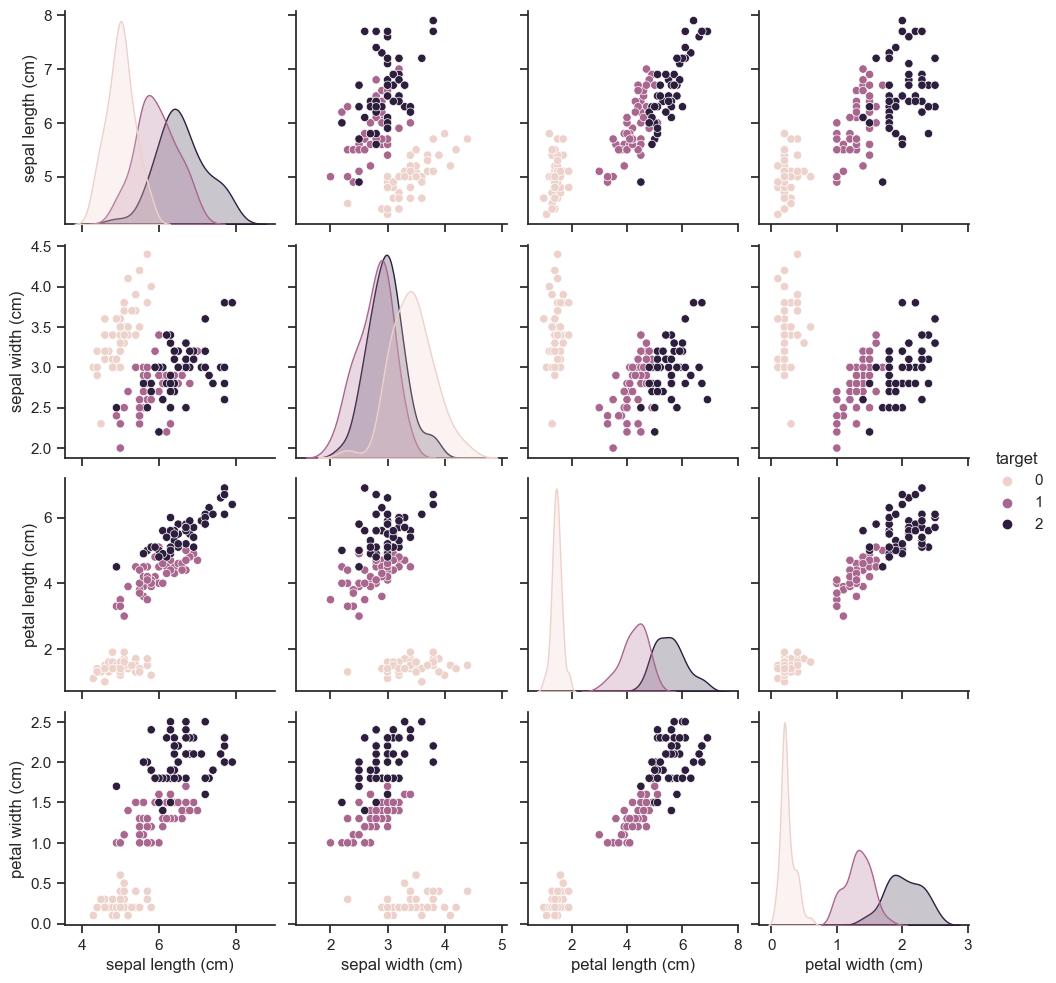

In [122]:
sns.set(style='ticks')
sns.pairplot(iris_df, hue='target')
plt.show()

### Separar o conjunto de dados em treinamento e testes

In [123]:
iris_df_X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
iris_df_Y = iris_df['target']

X_train, X_test, Y_train, Y_test = train_test_split(
    iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']],
    iris_df['target'],
    test_size=0.2,
    random_state=0
)

### Aplicar o KNN para treinar um modelo

Além disso, classificar os exemplos de testes

In [124]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

knn_Y_predicted = knn.predict(X_test)
knn_accuracy = np.sum(knn_Y_predicted == Y_test) / len(Y_test)

print('Acurácia: {:.2f}%'.format(100 * knn_accuracy))

Acurácia: 96.67%


### Aplicar o SVM para treinar um modelo

... e classificar os exemplos de testes...

In [125]:
from sklearn import svm

svm = svm.SVC(kernel='linear', probability=True)
svm.fit(X_train, Y_train)

svm_Y_predicted = svm.predict(X_test)
svm_accuracy = np.sum(svm_Y_predicted == Y_test) / len(Y_test)

print('Acurácia: {:.2f}%'.format(100 * svm_accuracy))

Acurácia: 100.00%


#### Calcular a precisão e revogação...

In [126]:
from sklearn.metrics import precision_recall_fscore_support

print("KNN (precisão, revogação, fscore)")
precision_recall_fscore_support(Y_test, knn_Y_predicted, average=None)

KNN (precisão, revogação, fscore)


(array([1.        , 1.        , 0.85714286]),
 array([1.        , 0.92307692, 1.        ]),
 array([1.        , 0.96      , 0.92307692]),
 array([11, 13,  6], dtype=int64))

In [127]:
print("SVM (precisão, revogação, fscore)")
precision_recall_fscore_support(Y_test, svm_Y_predicted, average=None)

SVM (precisão, revogação, fscore)


(array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([11, 13,  6], dtype=int64))

#### Calcular a Validação Cruzada...

In [128]:
from sklearn.model_selection import cross_val_score


scores_knn = cross_val_score(knn, iris_df_X, iris_df_Y, cv=5)
print('Acurácia KNN: {:.2f} (± {:.2f})'.format(scores_knn.mean(), scores_knn.std() * 2))

scores_svm = cross_val_score(svm, iris_df_X, iris_df_Y, cv=5)
print('Acurácia SVM: {:.2f} (± {:.2f})'.format(scores_svm.mean(), scores_svm.std() * 2))

Acurácia KNN: 0.97 (± 0.05)
Acurácia SVM: 0.98 (± 0.03)


----
# Atividades

Utilizar o conjunto de dados weatherHistory.csv, que contém o histórico de variáveis relacionadas ao clima da cidade de Szede, Hungria, entre 2006 e 2016.

Utilize técnicas de aprendizado de máquina supervisionado para criar modelos para prever o tipo de precipitação (Precip Type) de acordo com outras variáveis. Teste pelo menos três algoritmos e responda:

## 1. Leia o arquivo `weatherHistory.csv`
Armazene-os nas variável `df`. 

Chame a função `q1.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q1.hint()`

In [133]:
# q1.hint()

df = pd.read_csv('weatherHistory.csv')
q1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">CORRETO:</span> 



## 2. Divida o conjunto de treinamento (70% das instâncias) e de teste (30% das instâncias)

Utilize uma amostragem aleatória (pesquise um parâmetro que realize isso).

Armazene os dados nas seguintes variáveis:
- `X_train` - Conjunto de atributos de entrada para treinamento
- `Y_train` - Conjunto de saída para treinamento
- `X_test` - Conjunto de atributos de entrada para teste
- `Y_test` - Conjunto de saída para teste

Chame a função `q2.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q2.hint()`

In [130]:
# Resposta da 2
dfcopy = df.copy()

#Precip Type rain: 0, snow: 1, NaN: 2
dfcopy['Precip Type'] = dfcopy['Precip Type'].replace('rain', 0)
dfcopy['Precip Type'] = dfcopy['Precip Type'].replace('snow', 1)
dfcopy['Precip Type'] = dfcopy['Precip Type'].replace(np.nan, 2)
dfX = df[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
dfY = dfcopy['Precip Type']

X_train, X_test, Y_train, Y_test = train_test_split(
    dfX,
    dfY,
    test_size=0.3,
    random_state=0
)

#### Fique em dúvida se era pra usar dummies ou podia fazer da forma que fiz, Precip Type rain: 0, snow: 1, NaN: 2, também não entendi muito bem o que era a coluna NaN, como tinha poucas ocorrências no DF seria bem díficil de prever, porém deixei-os no DF ####

## 3. Faça uma análise simples da distribuição dos dados de Precipitação
Analise se os dados seguem uma distribuição normal ou não, se é contínuo ou não, etc. Talvez com 1 ou 2 gráficos você consiga tirar toda a informação necessária.

Tente extrair as informações fundamentais para **escolher um modelo de aprendizado de máquina supervisionado** ideal.

Essa questão não possui verificação automática mas você pode pedir dicas com `q3.hint()`

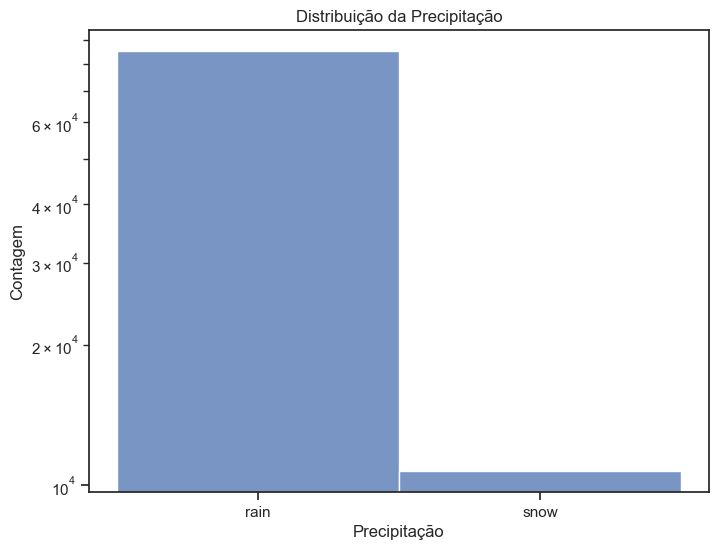

C:\Users\Miguel\AppData\Local\Temp\ipykernel_3608\2973279366.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues')


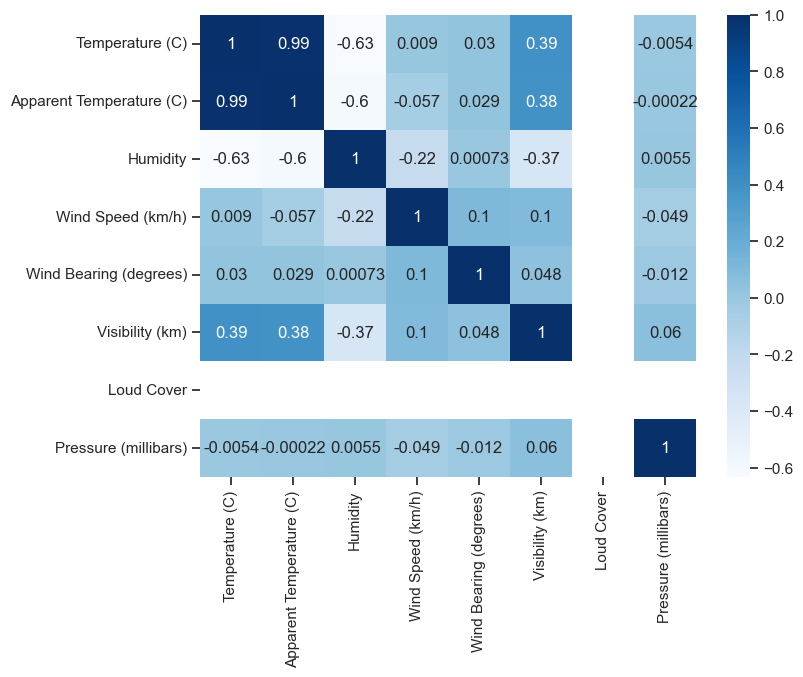

In [131]:
# Resposta da 3
#q3.hint(1)

plt.figure(figsize=(8, 6))
sns.histplot(df['Precip Type'], bins=30)
plt.xlabel('Precipitação')
plt.ylabel('Contagem')
plt.title('Distribuição da Precipitação')
plt.yscale('log')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()


## 4. Utilize técnicas de aprendizado de máquina **supervisionado** para prever o tipo de precipitação
Utilize técnicas de aprendizado de máquina supervisionado para criar modelos para prever o tipo de precipitação (Precip Type) de acordo com outras variáveis. 

Analise o conjunto de dadoTeste pelo menos três algoritmos. Escolha os que você julgar mais adequado e justifique porque o escolheu (uma frase curta, não precisa se aprofundar... tente aplicar os conhecimentos teóricos sobre cada modelo)


É esperado que você preencha uma célula de markdown descrevendo o método e o porquê o escolheu, e uma célula de código que faça o treinamento (`fit`) do modelo.

Essa questão não possui verificação automática mas você pode pedir dicas com `q4.hint()`

### Resposta da 4: - Modelo 1

**Modelo:** {{ KNN }}

**Justificativa:** {{ O KNN é um bom modelo de aprendizado de máquina devido à sua simplicidade, flexibilidade e capacidade de capturar padrões complexos nos dados. Apenas com uma pequena quantidade de hiperparâmetros, o KNN pode obter resultados muito bons.}}

In [61]:
# Resposta da 4: - Modelo 1
# Faça o modelo do primeiro modelo da 4. aqui!


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


#KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred_KNN = knn.predict(X_test)
print(classification_report(Y_test, Y_pred_KNN))

# Com esse modelo é possível prever se há chuva ou neve com uma precisão de 98%.

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     25583
         1.0       0.92      0.89      0.91      3194
         2.0       0.69      0.32      0.44       159

    accuracy                           0.98     28936
   macro avg       0.86      0.73      0.78     28936
weighted avg       0.97      0.98      0.97     28936



### Resposta da 4: - Modelo 2

**Modelo:** {{ Decision Tree }}

**Justificativa:** {{ A árvore de decisão é um bom modelo devido à sua capacidade de capturar relações não lineares, lidar com variáveis categóricas e interpretar as decisões tomadas durante o processo de classificação}}

In [66]:
# Resposta da 4: - Modelo 2
# Faça o modelo do segundo modelo da 4. aqui!

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_pred_DT = dt.predict(X_test)
print(classification_report(Y_test, Y_pred_DT))

# Com esse modelo é possível prever se há chuva ou neve com uma precisão de 99%

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     25583
         1.0       1.00      1.00      1.00      3194
         2.0       0.46      0.38      0.42       159

    accuracy                           0.99     28936
   macro avg       0.82      0.79      0.81     28936
weighted avg       0.99      0.99      0.99     28936



### Resposta da 4: - Modelo 3

**Modelo:** {{ Naive Bayes }}

**Justificativa:** {{ O Naive Bayes é um bom modelo devido à sua eficiência computacional e capacidade de lidar com conjuntos de dados de alta dimensionalidade, tornando-o útil em problemas com muitas características.}}

In [132]:
# Resposta da 4: - Modelo 3
# Faça o modelo do terceiro modelo da 4. aqui!

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred_NB = nb.predict(X_test)
print(classification_report(Y_test, Y_pred_NB))

# Com esse modelo é possível prever se há chuva ou neve com uma precisão de 92%

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96     25583
         1.0       0.65      0.97      0.78      3194
         2.0       0.12      0.29      0.17       159

    accuracy                           0.92     28936
   macro avg       0.59      0.73      0.63     28936
weighted avg       0.95      0.92      0.93     28936



## 5. Calcule estatísticas para cada algoritmo escolhido
Calcule a acurácia, precisão e revocação para cada rótulo (tipo de precipitação) para cada algoritmo testado.

É esperado que você preencha a tabela markdown abaixo com os resultados.

Essa questão não possui verificação automática mas você pode pedir dicas com `q5.hint()`

### Outra coisa que não entendi, a acurácia não é por modelo? Pra mim é a mesma pra todos os tipos de precipitação, não?

### Algoritmo 1

**Nome:** {{ Insira o nome do algoritmo 1 Testado }}

**Resultados:**

| Label                  	                  | Acurácia 	       | Precisão 	     | Revogação 	      |
|-------------------------------------------|------------------|----------------|------------------|
| {{Tipo Precip Type 0 --> RAIN}} 	         | 0.974          	 | 0.9825       	 | 0.9897         	 |
| {{Tipo Precip Type 1 --> SNOW} }	         | 0.974 	          | 0.922        	 | 0.8929         	 |
| {{Tipo Precip Type 2 --> VALORES NULOS}} 	 | 0.974 	          | 0.689        	 | 0.320         	  |

In [69]:
# Insira o código para calcular estatísticas do seu modelo/algoritmo 1.
from mlxtend.evaluate import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, support = precision_recall_fscore_support(Y_test, Y_pred_KNN, average=None)

for i in range(len(precision)):
    print("Rótulo:", i)
    print("Acurácia:", accuracy_score(Y_test, Y_pred_KNN))
    print("Precisão:", precision[i])
    print("Revocação:", recall[i])
    print("\n")

Rótulo: 0
Acurácia: 0.9754285319325408
Precisão: 0.9825391898184076
Revocação: 0.9897979126763866


Rótulo: 1
Acurácia: 0.9754285319325408
Precisão: 0.9229773462783172
Revocação: 0.8929242329367564


Rótulo: 2
Acurácia: 0.9754285319325408
Precisão: 0.6891891891891891
Revocação: 0.32075471698113206




<IPython.core.display.Javascript object>

AssertionError: Sem dicas disponíveis!

### Algoritmo 2

**Nome:** {{ Decision Tree }}

**Resultados:**

| Label                  	                   | Acurácia 	                    | Precisão 	       | Revogação 	   |
|--------------------------------------------|-------------------------------|------------------|---------------|
| {{Tipo Precip Type 0 --> RAIN}} 	          | 0.9941          	           	 | 0.9961         	 | 0.9972
| {{Tipo Precip Type 1 --> SNOW}} 	          | 0.9941          	             | 1        	       | 1           	 |
| {{Tipo Precip Type 2 --> VALORES NULOS}} 	 | 0.9941          	             | 0.46	            | 0.38	         |

In [70]:
# Insira o código para calcular estatísticas do seu modelo/algoritmo 2.

precision, recall, fscore, support = precision_recall_fscore_support(Y_test, Y_pred_DT, average=None)

for i in range(len(precision)):
    print("Rótulo:", i)
    print("Acurácia:", accuracy_score(Y_test, Y_pred_DT))
    print("Precisão:", precision[i])
    print("Revocação:", recall[i])
    print("\n")

#q5.hint()

Rótulo: 0
Acurácia: 0.994159524467791
Precisão: 0.9961733697774307
Revocação: 0.9972247195403198


Rótulo: 1
Acurácia: 0.994159524467791
Precisão: 1.0
Revocação: 1.0


Rótulo: 2
Acurácia: 0.994159524467791
Precisão: 0.4621212121212121
Revocação: 0.3836477987421384




<IPython.core.display.Javascript object>

<span style="color:#3366cc">Dica 1:</span> Visite o roteiro para ver como é calculado a acurácia, precisão e revogação.
(Para outra dica, chame `.hint(2)`)

### Algoritmo 3

**Nome:** {{ Navie Bayes }}

**Resultados:**

| Label                  	                   | Acurácia 	        | Precisão 	       | Revogação 	        |
|--------------------------------------------|-------------------|------------------|--------------------|
| {{Tipo Precip Type 0 --> RAIN }} 	         | 0.9234          	 | 0.9913         	 | 0.9215           	 |
| {{Tipo Precip Type 1 --> SNOW}} 	          | 0.9234	                 | 0.650	           | 0.9699	            |
| {{Tipo Precip Type 2 --> VALORES NULOS}} 	 | 0.9234	                 | 0.116 	          | 0.289	             |

In [71]:
# Insira o código para calcular estatísticas do seu modelo/algoritmo 3.

precision, recall, fscore, support = precision_recall_fscore_support(Y_test, Y_pred_NB, average=None)

for i in range(len(precision)):
    print("Rótulo:", i)
    print("Acurácia:", accuracy_score(Y_test, Y_pred_NB))
    print("Precisão:", precision[i])
    print("Revocação:", recall[i])
    print("\n")


Rótulo: 0
Acurácia: 0.9234517555985623
Precisão: 0.9913800353208309
Revocação: 0.9215885548997381


Rótulo: 1
Acurácia: 0.9234517555985623
Precisão: 0.6508403361344538
Revocação: 0.9699436443331246


Rótulo: 2
Acurácia: 0.9234517555985623
Precisão: 0.116751269035533
Revocação: 0.2893081761006289




<IPython.core.display.Javascript object>

<span style="color:#3366cc">Dica 1:</span> Visite o roteiro para ver como é calculado a acurácia, precisão e revogação.
(Para outra dica, chame `.hint(2)`)

## 6.  É possível melhorar o algoritmo se forem selecionados alguns atributos em particular, ao invés de utilizar todos?
Descreva sua resposta para cada um dos algoritmos. Utilize evidências empíricas, se achar conveniente.

Essa questão não possui verificação automática mas você pode pedir dicas com `q6.hint()`

{{ Sim, é possível. Peguei a matriz de correlação com os atributos que mais se destacam tanto em correlação negativa quanto positiva. Irei responder a seguir em markdowns o que mudou pra cada modelo.}}

C:\Users\Miguel\AppData\Local\Temp\ipykernel_3608\4046307089.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfcopy.corr(), annot=True, cmap='Blues')


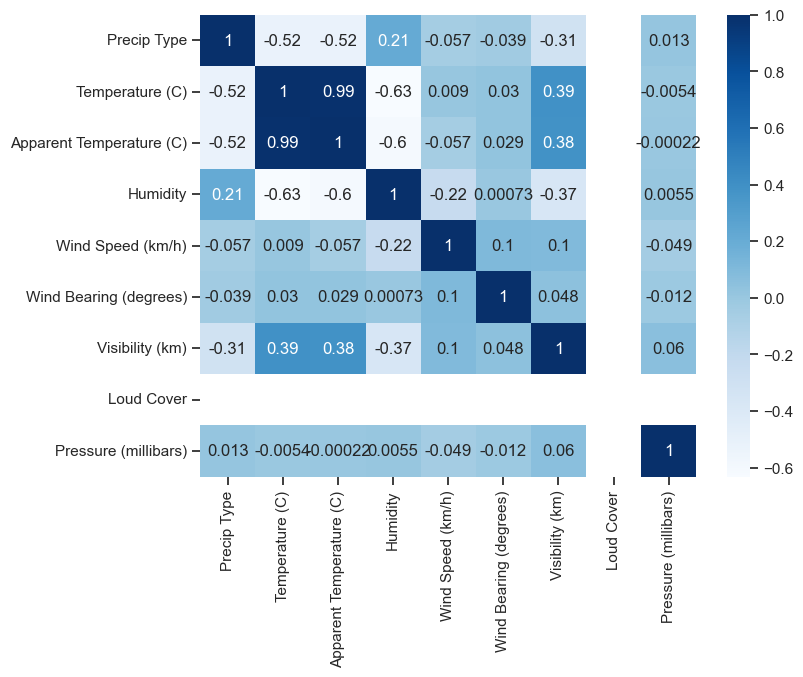

In [86]:
# Com certeza, pela matriz de correlação:

plt.figure(figsize=(8, 6))
sns.heatmap(dfcopy.corr(), annot=True, cmap='Blues')
plt.show()

#Vamos pegar atributos com boas correlações, tanto positivas quanto negativas, com o atributo alvo (Precip Type)
# Temperature (C), Humidity e Visibility (km) são os que mais se destacam

In [82]:
# Os novos modelos, mudei também a random_state para 42

X_train, X_test, Y_train, Y_test = train_test_split(
    dfcopy[['Temperature (C)', 'Humidity', 'Visibility (km)']],
    dfcopy['Precip Type'],
    test_size=0.3,
    random_state=42)

In [83]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred_KNN = knn.predict(X_test)
print(classification_report(Y_test, Y_pred_KNN))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     25521
         1.0       0.98      0.99      0.99      3253
         2.0       0.54      0.23      0.33       162

    accuracy                           0.99     28936
   macro avg       0.84      0.74      0.77     28936
weighted avg       0.99      0.99      0.99     28936



{{ O modelo KNN melhhorou em quase todos os aspectos. Para o tipo 0 (rain), sua precisão, revocação e f1-score aumentaram em um ponto percentual. Para o tipo 1 (snow), foi excelente de 92/89/91 para 98/99/99. Para o tipo NAN diminuiu, já que é um tipo que não temos muitos dados. A acurácia do modelo aumentou de 98% para 99%.}}

In [84]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)
Y_pred_DT = dt.predict(X_test)
print(classification_report(Y_test, Y_pred_DT))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     25521
         1.0       1.00      1.00      1.00      3253
         2.0       0.36      0.33      0.35       162

    accuracy                           0.99     28936
   macro avg       0.79      0.78      0.78     28936
weighted avg       0.99      0.99      0.99     28936



{{ O modelo Decision Tree não mudou muito}}

In [85]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred_NB = nb.predict(X_test)
print(classification_report(Y_test, Y_pred_NB))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96     25521
         1.0       0.70      0.82      0.76      3253
         2.0       0.00      0.00      0.00       162

    accuracy                           0.94     28936
   macro avg       0.56      0.59      0.57     28936
weighted avg       0.94      0.94      0.93     28936



C:\Users\Miguel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Miguel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Miguel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{{ O modelo Naive Bayes aumentou sua acurácia de 92 para 94}}

## 7. Você percebeu alguma diferença no tempo de processamento dos algoritmos? Qual foi o mais lento? E qual foi o mais rápido?
Descreva sua resposta para cada um dos algoritmos. Utilize evidências empíricas, se achar conveniente.

Essa questão não possui verificação automática mas você pode pedir dicas com `q7.hint()`

{{ Resposta da 7. O mais 'lento' foi o Decision Tree e o mais rápido foi o Naive Bayes. O KNN ficou no meio termo. }}

In [101]:
import timeit

benchmark = []
for clf in [knn, dt, nb]:
    benchmark.append(timeit.timeit(lambda: clf.fit(X_train, Y_train), number=10))

print(benchmark)
print("O mais 'lento' foi o Decision Tree e o mais rápido foi o Naive Bayes")
print("O KNN ficou no meio termo")

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Dica 2:</span> Pesquise sobre como realizar um benchmark de tempo em python usando o pacote `time`.

[0.7796782000000348, 1.3498497000000498, 0.12971450000031837]
O mais 'lento' foi o Decision Tree e o mais rápido foi o Naive Bayes
O KNN ficou no meio termo


## 8. Mostre a matriz de confusão para os resultados.
Pesquise como fazer uma matriz de confusão. Descreva sua resposta para cada um dos algoritmos. Evidencie explicitamente o código utilizado, usando bibliotecas ou não.

Essa questão não possui verificação automática mas você pode pedir dicas com `q8.hint()`

{{ Resposta da 8. }}

<Axes: xlabel='Predicted', ylabel='Actual'>

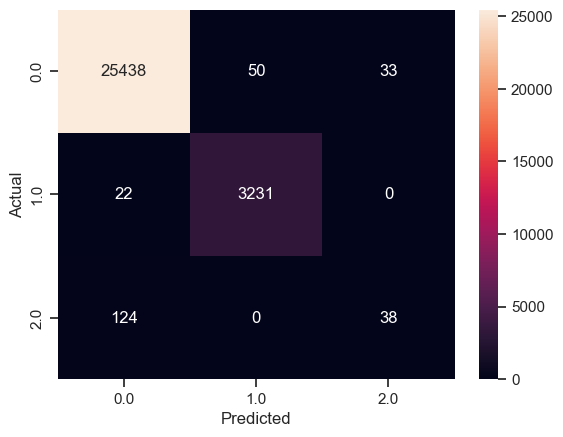

In [116]:
#q8.hint(1)
#KNN - Matriz de Confusão
confusion_matrix = pd.crosstab(Y_test, Y_pred_KNN, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d')

##### A interpretação da matriz é a seguinte:

* Para as observações da classe 0 (actual 0), foram classificadas corretamente como classe 0 em 25438 casos, classificadas como classe 1 em 50 casos e classificadas como classe 2 em 33 casos.
* Para as observações da classe 1 (actual 1), foram classificadas corretamente como classe 1 em 3231 casos, classificadas como classe 0 em 22 casos e não foram classificadas como classe 2.
* Para as observações da classe 2 (actual 2), foram classificadas corretamente como classe 2 em 38 casos, classificadas como classe 0 em 124 casos e não foram classificadas como classe 1.

<Axes: xlabel='Predicted', ylabel='Actual'>

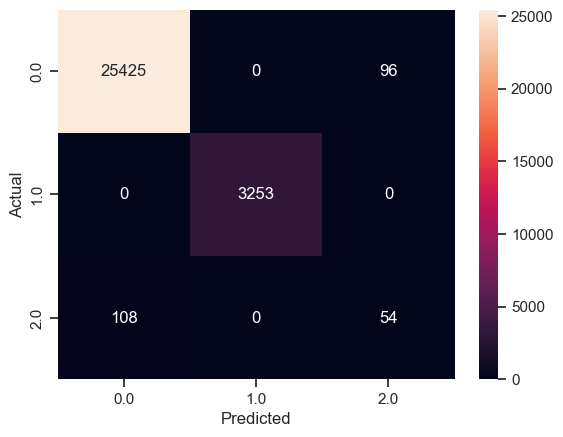

In [117]:
#Decision Tree - Matriz de Confusão
confusion_matrix = pd.crosstab(Y_test, Y_pred_DT, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d')

##### A interpretação da matriz é a seguinte:

* Para as observações da classe 0 (actual 0), foram classificadas corretamente como classe 0 em 25425 casos, classificadas como classe 1 em 0 casos e classificadas como classe 2 em 96 casos.
* Para as observações da classe 1 (actual 1), foram classificadas corretamente como classe 1 em 3253 casos, e não foram classificadas como classe 0 e 2.
* Para as observações da classe 2 (actual 2), foram classificadas corretamente como classe 2 em 54 casos, classificadas como classe 0 em 108 casos e não foram classificadas como classe 1.
* ESSE É O MELHOR MODELO

<Axes: xlabel='Predicted', ylabel='Actual'>

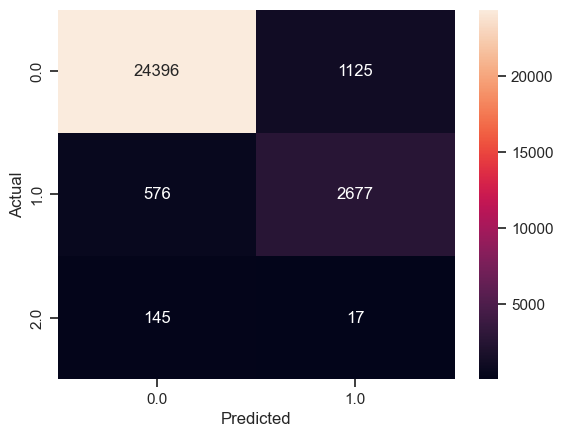

In [118]:
#Naive Bayes - Matriz de Confusão
confusion_matrix = pd.crosstab(Y_test, Y_pred_NB, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d')

* Para as observações da classe 0 (actual 0), foram classificadas corretamente como classe 0 em 24396 casos, classificadas como classe 1 em 1125 casos
* Para as observações da classe 1 (actual 1), foram classificadas corretamente como classe 1 em 2677 casos, e não foram classificadas como classe 1 e 2.
* O tipo 2 não entendi o que aconteceu com ele, mas acredito que seja por causa da quantidade de dados que temos dele.
